In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_plano_saude = pd.read_csv('../data/plano_saude2.csv')
df_plano_saude

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [3]:
X = df_plano_saude.iloc[:, 0:1].values
y = df_plano_saude.iloc[:, 1].values

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) #elevação
X_poly = poly.fit_transform(X)

In [37]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [38]:
X_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [39]:
X_poly[0]

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

In [40]:
from sklearn.linear_model import LinearRegression
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y)

LinearRegression()

In [41]:
new = [[40]]

In [42]:
new = poly.transform(new)
new

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

In [43]:
#custo para uma pessoa de 40 anos
poly_regression.predict(new)

array([1335.33958015])

In [44]:
previsions = poly_regression.predict(X_poly)
previsions

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

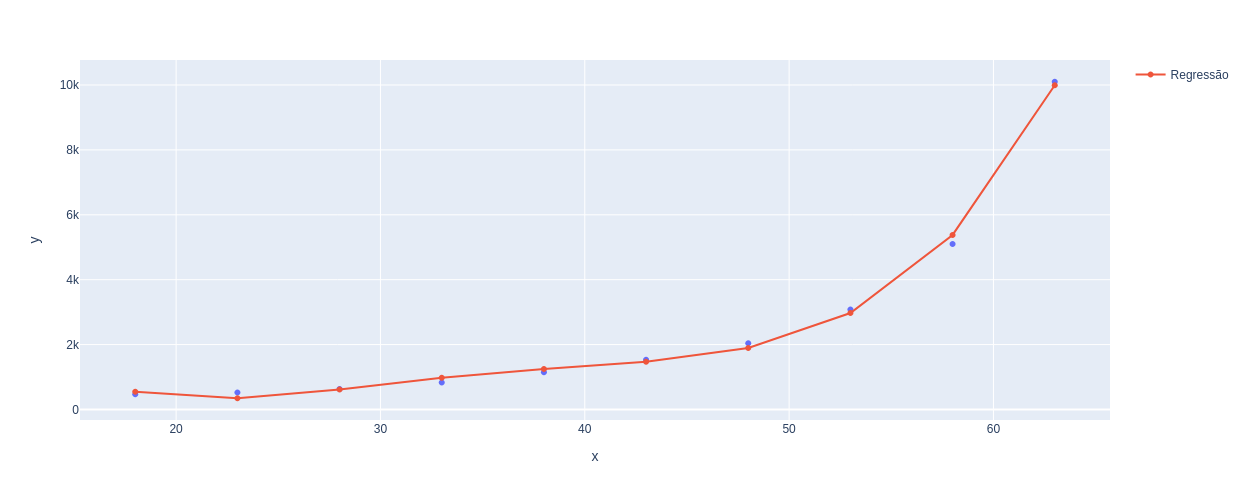

In [45]:
g = px.scatter(x = X[:,0], y = y, width=800, height=500)
g.add_scatter(x = X[:,0], y = previsions, name = 'Regressão')
g.show()